## NYC KPI DA

LIST OF KPIs
* vehicle hours reduction ($\Delta T_v$)
* travellers utility gains ($\Delta U_p$)
* share of pooling (shared ratio, $S$)
* occupancy ($O$)
* passenger hours increase (pooling detour, $\Delta T_p$)

In [75]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

plt.style.use(['science','no-latex'])

In [76]:
df = pd.read_csv('KPI_resultsNYC.csv', index_col=0)

In [77]:
df.to_csv('KPI_resultsNYC.csv')
df.Start_time = df.apply(lambda row: pd.Timestamp(row.Start_time), axis=1) #convert "Start_time" to time type

In [78]:
df.Start_time = pd.to_datetime(df.Start_time)
df.End_time = pd.to_datetime(df.End_time)

In [79]:
df['del_VehHourTrav']=(df['VehHourTrav_ns']-df['VehHourTrav'])/df['VehHourTrav'] #KPI1: vehicle hours reduction

In [80]:
df['del_PassUtility']=abs((df['PassUtility_ns']-df['PassUtility'])/df['PassUtility']) #KPI2:travellers utility gains

In [81]:
df['Occupancy']=df['PassHourTrav']/df['VehHourTrav'] #KPI4:occupancy

In [82]:
df['del_PassHourTrav']=abs((df['PassHourTrav_ns']-df['PassHourTrav'])/df['PassHourTrav']) #KPI5:passenger hours increase

In [83]:
df.Start_time = df.apply(lambda row: pd.Timestamp(row.Start_time), axis=1)

> THE CRITICAL MASS

Text(0.5, 0, 'Demand')

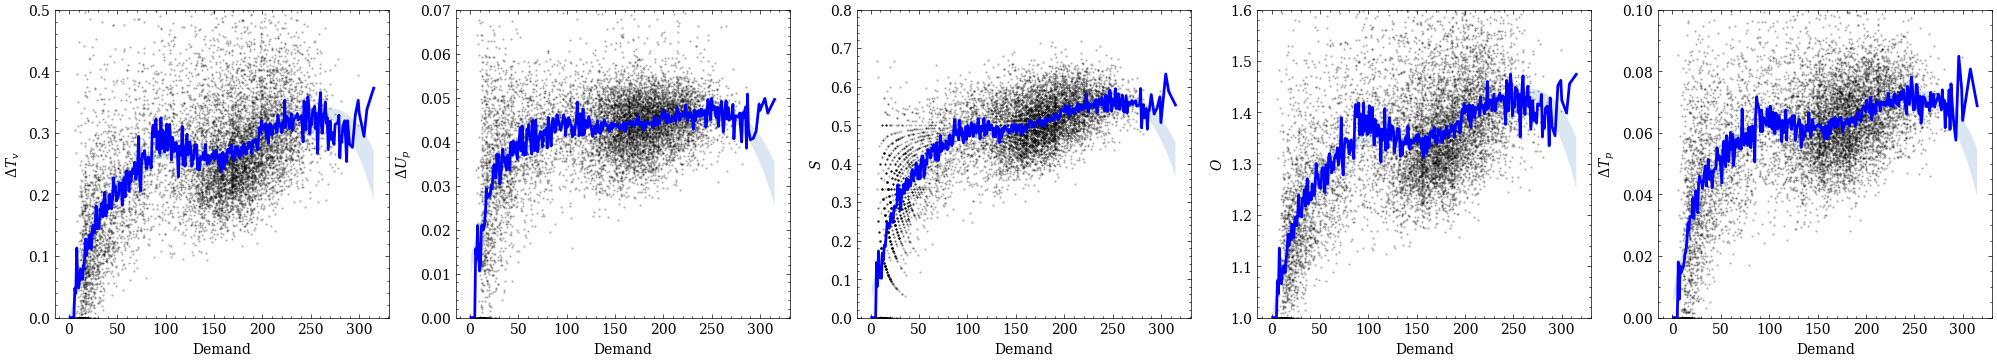

In [84]:
fig, axes = plt.subplots(1,5, figsize = (25,4))
axes = axes.flatten()

ax=axes[0]
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]
sns.regplot(data = to_plot, x = 'Demand_size', y = 'del_VehHourTrav', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))].groupby(df.Demand_size).del_VehHourTrav.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.5))
ax.set_ylabel("$\Delta T_v$")
ax.set_xlabel("Demand")

ax=axes[1]
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]
sns.regplot(data = to_plot, x = 'Demand_size', y = 'del_PassUtility', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))].groupby(df.Demand_size).del_PassUtility.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.07))
ax.set_ylabel("$\Delta U_p$")
ax.set_xlabel("Demand")

ax=axes[2]
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]
sns.regplot(data = to_plot, x = 'Demand_size', y = 'shared_ratio', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))].groupby(df.Demand_size).shared_ratio.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.8))
ax.set_ylabel("$S$")
ax.set_xlabel("Demand")

ax=axes[3]
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]#.groupby(df.Demand_size).Occupancy.mean()
sns.regplot(data = to_plot, x = 'Demand_size', y = 'Occupancy', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))].groupby(df.Demand_size).Occupancy.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((1,1.6))
ax.set_ylabel("$O$")
ax.set_xlabel("Demand")

ax=axes[4]
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))]
sns.regplot(data = to_plot, x = 'Demand_size', y = 'del_PassHourTrav', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 4, ax = ax, 
            line_kws = {'lw':0})
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]))].groupby(df.Demand_size).del_PassHourTrav.mean()
to_plot.plot(ax = ax, lw = 2, color = 'blue')
ax.set_ylim((0,0.1))
ax.set_ylabel("$\Delta T_p$")
ax.set_xlabel("Demand")

> KPI DISTRIBUTION with standard deviation

Text(0.5, 1.0, 'Passenger hours increase')

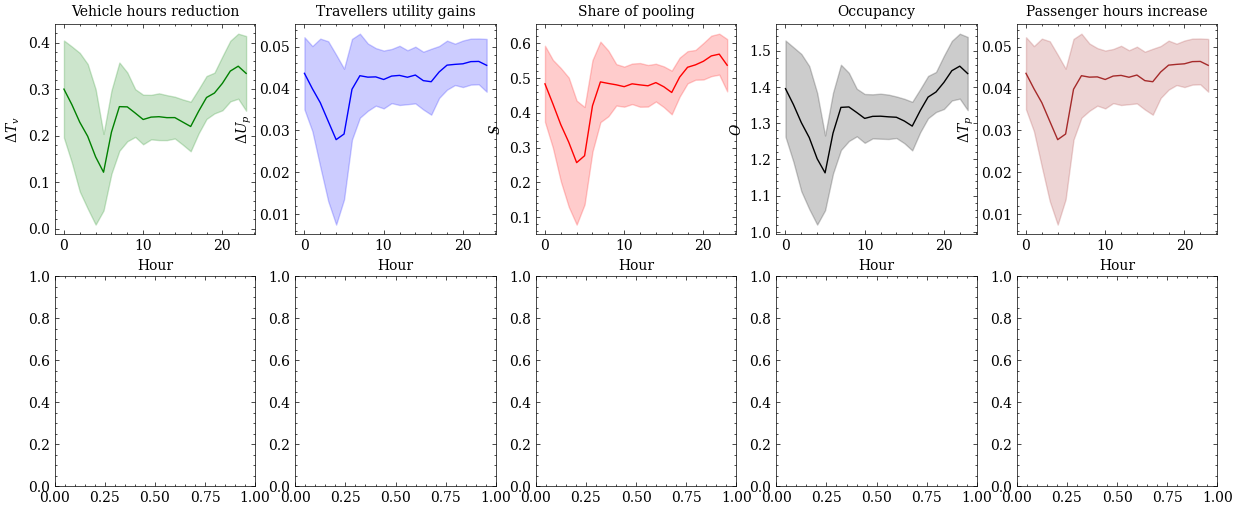

In [130]:

# Setup the subplot2grid Layout
fig = plt.figure(figsize=(15, 6))
ax1 = plt.subplot2grid((2,5), (0,0)) 
ax2 = plt.subplot2grid((2,5), (0,1)) 
ax3 = plt.subplot2grid((2,5), (0,2)) 
ax4 = plt.subplot2grid((2,5), (0,3)) 
ax5 = plt.subplot2grid((2,5), (0,4)) 
ax6 = plt.subplot2grid((2,5), (1,0)) 
ax7 = plt.subplot2grid((2,5), (1,1)) 
ax8 = plt.subplot2grid((2,5), (1,2)) 
ax9 = plt.subplot2grid((2,5), (1,3)) 
ax10 = plt.subplot2grid((2,5), (1,4)) 

ax=ax1
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = df.Start_time.dt.hour, y = 'del_VehHourTrav', ax = ax, color='green', errorbar ='sd')
ax1.set_xlabel('Hour')
ax1.set_ylabel("$\Delta T_v$")
ax1.set_title("Vehicle hours reduction", fontsize=10)

ax=ax2
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = df.Start_time.dt.hour, y = 'del_PassUtility', ax = ax, color='blue', errorbar ='sd')
ax2.set_xlabel('Hour')
ax2.set_ylabel("$\Delta U_p$")
ax2.set_title("Travellers utility gains", fontsize=10)

ax=ax3
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = df.Start_time.dt.hour, y = 'shared_ratio', ax = ax, color='red', errorbar ='sd')
ax3.set_xlabel('Hour')
ax3.set_ylabel("$S$")
ax3.set_title("Share of pooling", fontsize=10)

ax=ax4
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = df.Start_time.dt.hour, y = 'Occupancy', ax = ax, color='black', errorbar ='sd')
ax4.set_xlabel('Hour')
ax4.set_ylabel("$O$")
ax4.set_title("Occupancy", fontsize=10)

ax=ax5
for d in df.shared_discount.unique():
    to_plot = df
    sns.lineplot(data = to_plot, x = df.Start_time.dt.hour, y = 'del_PassUtility', ax = ax, color='brown', errorbar ='sd')
ax5.set_xlabel('Hour')
ax5.set_ylabel("$\Delta T_p$")
ax5.set_title("Passenger hours increase", fontsize=10)